# 회귀분석이란 무엇인가?
회귀분석(regression)은 가장 넓은 의미로는 독립변수(x)로 종속변수(y)를 예측하는 것을 의미

변수: 변할 수 있는 수
독립 변수: 원인이 되는 열
종속 변수: 결과가 되는 열
상관관계가 있다 = 한쪽이 바뀌였을 떄 다른쪽의 값도 바뀐다면 두개의 특성은 서로 관련이 있다 라고 추측할 수 있다.

## 선형회귀 분석
회귀분석을 좀 더 좁은 의미로 말할 떄는 종속변수가 연속인 경우를 말한다. 종속변수가 범주형인 경우에는 '분류'라고 한다.
더 좁은 의미로는 선형 회귀 분석을 의미한다. 선형 회귀 분석은 독립변수와 종속변수 사이에 직선인 형태의 관계가 있다고 가정을 한다.


## 회귀계수
선형 모형에서 x와 y의 관계를 수식으로 나타내면  y = wx +b 
w : 회귀계수(cofiicient)
독립 변수 x 가 n 증가할때마다 y는 nw만큼 증가한다.
절편: 독립변수가 모두 0일떄 종속변수 y의 값

## 회귀분석의 결과로 알 수 있는 것
1. 모형 적합도: 모형이 데이터 얼마나 잘 맞는가? ex) 식사량과 체중의 관계가 데이터에 잘 맞는지 검증해볼 수 있다.
2. 회귀계수: 독립변수의 변화가 종속변수를 얼마나 변화시키는가?

### 회귀분석의 사전 진단

In [1]:
import pandas as pd

In [13]:
speed = [4,4,7,7,8,9,10,10,10,11,11,12,12,12,12, 13,13,13,13,14,14,14,14,15,15,15,16,16,17,17,17,18,18,18,18,19,19,19,20,20,20,20,20,20,22,23,24,24,24,25]
dist = [2,10,4,22,16,10,18,26,34,17,28,14,20,24,28,26,34,34,46,26,36,60,80,20,26,54,32,40,32,40,50,42,56,76,84,36,46,68,32,48,52,56,64,66,54,70,92,93,120,85]

In [14]:
d = { "speed" :speed, "dist" :dist}

In [15]:
len(d["dist"])

50

In [16]:
df = pd.DataFrame(data=d)

In [17]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 사전작업
산점도에 추세선을 넣어 데이터에 선혀적인 패턴이 있는지 확인한다. <br>
극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있다. 

In [18]:
import seaborn as sns

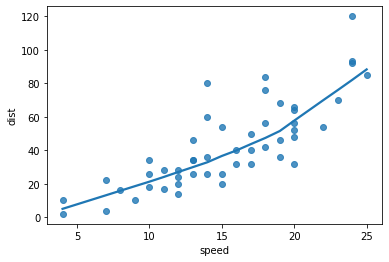

In [19]:
sns.regplot('speed', 'dist', lowess=True, data=df)

Text(0.5, 1.0, 'Distance')

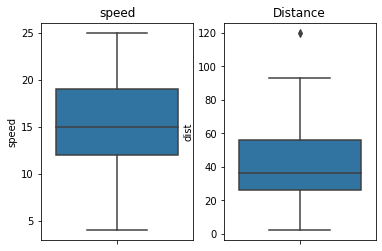

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('speed')

sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

Text(0.5, 1.0, 'Distance')

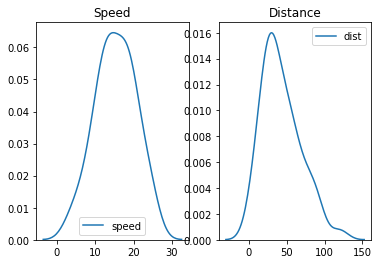

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

대체로 중심부에 데이터가 몰려있고 좌우로 갈 수 록 줄어드는 정규분포와 비슷한 형태를 보인다.<br>
데이터가 치우친 정도를 나타내는 왜도(skeness)를 구해본다.


In [28]:
import scipy.stats

scipy.stats.skew(df['speed'])

-0.1538627730553095

In [29]:
scipy.stats.skew(df['dist'])

0.7824835173114966

## 회귀분석 실시
ols 함수로 회귀분석을 실시한다. 종속변수 ~ 독립변수의 형태로 모형식을 쓴다.

In [30]:
from statsmodels.formula.api import ols

In [31]:
res = ols('dist~speed', data=df).fit()

In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     91.68
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.03e-12
Time:                        23:47:02   Log-Likelihood:                -206.20
No. Observations:                  50   AIC:                             416.4
Df Residuals:                      48   BIC:                             420.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7165      6.795     -2.754      0.008     -32.379      -5.054
speed          4.0272      0.421      9.575      0.000       3.182       4.873
==============================================================================
Omnibus:                        8.054   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.105
Skew:                           0.824   Prob(JB):                       0.0286
Kurtosis:                       3.834   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모형적합도: 모형이 데이터에 잘 맞는 정도를 보여주는 지표

R-squared : 0.656
- R제곱
- 모형 적합도(혹은 설명력)
- dist의 분산을 speed가 약 65%를 설명한다
- 각사례마다 dist에 차이가 있다.
<h3>Adj. R-squared :0.649</h3>
- 독립변수가 여러 개인 다중회기분석에서 사용
- 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
- 서로 다른 모형을 비교할 떄는 이 지표가 높은 쪽을 선택한다.
<h3>F-statistic:91.68 , 	Prob (F-statistic):	1.03e-12</h3>
- 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함(p<0.05)
- 즉 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있다.
<h3>Likelihood</h3>
- 로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다.
- AIC, BIC: 로그우도를 독립변수의 수로 보정한 값(작을수록 좋다.)

##  회귀계수 (Coefiicients)
Ceof 는 데이터로부터 얻은 계수의 추정치를 말한다.
Intercept의 추정치는 18.71651로  0일 떄 dist의 값이다.
speed의 계수 추정치는 4.0272로 speed가 1증가할 떄마다 dist가 4.0272증가한다는 것을 의미한다.<br>

<strong>dist = -18.7165 + 4.0272xspeed </strong>

P(>[t]) 는 모집단에서 계수가 0일 때,현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값을 나타낸다.
이 확률이 매우작다는 것은, 모집단에서 speed의 계수가 정확히는 4.0272이 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미한다.
보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면 (p<0.05), "통계적으로 유의미하다 "라고 한다.


## 결과 보고
논문 등에서 회귀분석의 결과는 다음 순서대로 보고한다.
1. 먼저 모형적합도를 보고한다. F 분포의 파라미터 2개와 그 때의 값 F값,p-value와 유의수준의 비교를 적시한다.
dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다.
<h2>F(1,48) = 91.68, p< 0.05) </h2>
2. 독립변수에 대해 보고한다.
    speed의 회귀계수는 4.0272로 dist에 대하여 유의미한 예측변인 것으로 나타났다.
    (t(48)= 9.575, p <0.05)

# 절변의 고정

윗 데이터에서 dist는 거리를 뜻한다, 앞선 분석 결괴에서 speed 가 0일 떄 dist가  -18.7165이되는데 거리가 마이너스가 될 수 없으므로 해석이 어색하다. 이럴 경우 모형에서 절편을 제거한다.

In [33]:
# 절편의 제거
res = ols('dist ~ 0 +speed', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.7
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                    9.14e-26
Time:                        00:26:28   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9287      0.142     20.583      0.000       2.643       3.215
==============================================================================
Omnibus:                       13.476   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.230
Skew:                           1.159   Prob(JB):                     0.000813
Kurtosis:                       4.207   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R제곱
모형에서 절편을 제거한 경우 R제곱을 해서할 때 주의가 필요하다. 절편이 있는 경우와 없는 경우 계산 방식이 다르기 때문이다. 

- 절편이 있는 경우: 종속변수의 분산에서 설명하는 비율
- 절편이 없는 경우: 종속변수의 제곱의 평균에서 설명하는 비율을 나타낸다.

# 다중공선성
- 공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 서로 상관이 높은 경우
- 다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- 다중공선성이 있으면:
1. 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다.
2. 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다.

## 다중 공선성의 진단
- 분산팽창계수(VIF, Variance Infaltion Facrot)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단

In [36]:
import pandas as pd
df = pd.read_csv('./data/crab.csv')
df.head()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3


In [37]:
from statsmodels.formula.api import ols

model = ols('y ~sat + weight +width',df)


In [38]:
res= model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.30e-26
Time:                        00:41:16   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.063      -1.924       0.051
sat            0.0971      0.009     11.018      0.000       0.080       0.115
weight        -0.0465      0.098     -0.475      0.635      -0.240       0.147
width          0.0535      0.026      2.023      0.045       0.001       0.106
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.545
Skew:                           0.086   Prob(JB):                       0.0230
Kurtosis:                       1.992   Cond. No.                         526.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
model.exog_names

['Intercept', 'sat', 'weight', 'width']

In [41]:
variance_inflation_factor(model.exog, 1)

1.15883687808578

In [42]:
variance_inflation_factor(model.exog, 2)

4.8016794240392375

weight 와 width의 상관이 높기 때문에 VIF가 약간 높게 나타나는 것이다

In [43]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,sat,1.158837
1,weight,4.801679
2,width,4.688660


## 대처
1. 계수가 통계적으로 유의미하지 않다면 대처(계수가 통계적으로 유의미 하다면 VIF가 크더라도 특별히 대처할 필요가 없다.)
2. 변수들을 더하거나 뺴서 새로운 변수를 만든다.(두 예측 변수를 더하거나 뺴더라도 문제가 없는 경우)
ex) 남편의 수입과 아내이 수입이 서로 상관이 높다면, 두개를  더해 가족수입이라는 하나의 변수로 투입한다.
3. 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다.(단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제)

In [44]:
model = ols('y ~ sat + weight', df)

In [45]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     85.93
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           1.63e-26
Time:                        00:50:38   Log-Likelihood:                -57.901
No. Observations:                 173   AIC:                             121.8
Df Residuals:                     170   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.114      0.433      0.665      -0.176       0.275
sat            0.0976      0.009     10.982      0.000       0.080       0.115
weight         0.1260      0.049      2.598      0.010       0.030       0.222
==============================================================================
Omnibus:                       40.033   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.709
Skew:                           0.121   Prob(JB):                       0.0128
Kurtosis:                       1.928   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

이전의 분석에서는 weight가 유의미하지 않게 나왔지만, width를 제거한 후에는 유의미하게 나왔다. weight와 width가 공선성이 있기 때문에 width를 제거하자 weight가 유의미해진 것으로 볼 수 있다.

# 잔차 분석
- 예측값(fitted)과 잔차(residual)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
- 빨간 실선은 잔차의 추세를 나타냄
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

In [55]:
import pandas as pd
from statsmodels.formula.api import ols

df = pd.read_csv('./data/cars.csv')
res = ols('dist ~ 0 +speed', df).fit()

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
fitted = res.predict(df)
residual = df['dist'] - fitted

In [57]:
fitted

0     11.636529
1     11.636529
2     20.363925
3     20.363925
4     23.273057
5     26.182189
6     29.091321
7     29.091321
8     29.091321
9     32.000454
10    32.000454
11    34.909586
12    34.909586
13    34.909586
14    34.909586
15    37.818718
16    37.818718
17    37.818718
18    37.818718
19    40.727850
20    40.727850
21    40.727850
22    40.727850
23    43.636982
24    43.636982
25    43.636982
26    46.546114
27    46.546114
28    49.455246
29    49.455246
30    49.455246
31    52.364379
32    52.364379
33    52.364379
34    52.364379
35    55.273511
36    55.273511
37    55.273511
38    58.182643
39    58.182643
40    58.182643
41    58.182643
42    58.182643
43    64.000907
44    66.910039
45    69.819171
46    69.819171
47    69.819171
48    69.819171
49    72.728304
dtype: float64

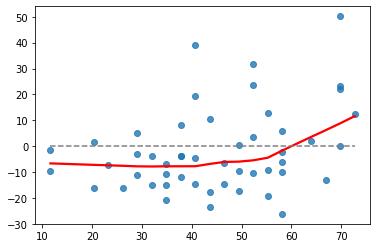

In [59]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

## 잔차의 정규성
- 잔차가 정규분포를 따른다는 가정
- Q-Q플롯으로 확인할 수 있ㄷ음
- 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

In [49]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

In [50]:
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

NameError: name 'x' is not defined